In [139]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import random 

In [140]:
from sklearn.datasets import make_blobs

In [141]:
X, y = make_blobs(n_samples = 100 , centers = 5 , n_features = 2 , random_state = 42)
# n_features= 2 means 2d data 
# centers = 5 means 5 classes 
# n_samples = 100 means 100 points 

In [142]:
print(type(X))
print(len(X))

<class 'numpy.ndarray'>
100


In [143]:
type(X[0]) #Just for confirmation ;)

numpy.ndarray

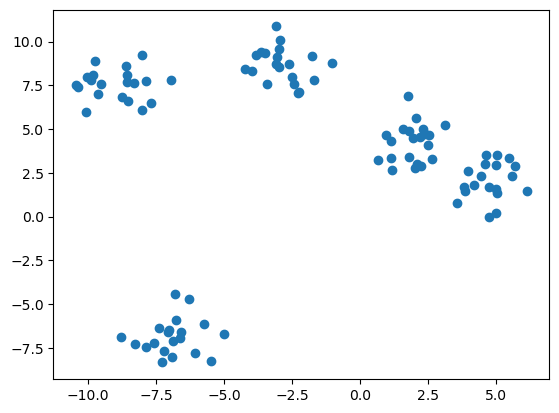

In [144]:
plt.scatter(X[: ,0] , X[: ,1])
# plt.scatter takes two inputs x , y . Here both are present in X (the x and y coordinates)
plt.show()

## The Algorithm Outline

 #### 1. Initialise the centroids randomly 
 #### 2. While not converged:
        I. Cluster Assignment: Assign each
        data point to the closest cluster
        centre
        II. Move Centroid: Re-compute the
        cluster centres using the current
        cluster memberships.
        III. If a convergence criterion is not
        met, go to 2.


In [145]:
def distance(a , b):
    # a and b both are vectors 
    return np.linalg.norm(a - b) 

In [146]:
def AssignCluster(VectA , Centroids):
    '''
    VectA is a point which is an nd-array 
     Centroids is an array with k points 
    '''
    minDist = distance(Centroids[0] , VectA)
    ID = 0 
    minID = -1 
    
    for centroid in Centroids:
        P = distance(centroid , VectA)
        if(P <= minDist):
            minDist = P 
            minID = ID
        ID+=1
    
    return minID

In [147]:
def ReassignCentroids(Clusters , k , X):
    '''
    Clusters is a dictionary with key = ndarray (point) and value as its Cluster label
    '''
    Means = []
    for i in range(k):
        Y = []
        for key, val in Clusters.items() : 
            if val == i :
                Y.append(key)
        Means.append(np.mean(np.array(Y) , axis = 0))
    
    # now we have the new means 
    
    new_clusters = []
    
    for point in X : 
        new_clusters.append(AssignCluster(point , Means))
        
    return new_clusters, np.array(Means)
        

# #Toy example 
# clusters = {
#         (1 , 2) : 0 , 
#         (2 , 3) : 1 , 
#         (5 , 6) : 2 , 
#         (8 , 8) : 3 ,
# }
# k = 4 
# X = np.array([[ -7.07198816 , -6.57856225],
#               [  4.97114227 ,  2.94871481],
#               [-10.38899119 ,  7.39208589],
#               [ -7.87016352 , -7.44640732],
#              [ -6.6601912  ,  -1.38998415],
#              [ -7.6601912  ,  6.38998415],
#              [ -9.6601912  ,  18.8998415],
#              [ -0.6601912  ,  10.38998415]]
# )
# print(ReassignCentroids(clusters , k , X))

In [148]:
# k means clustering algorithm , assigns each point a cluster 
def kmeans(X , k):
    
    centroids = X[np.random.choice(X.shape[0], k, replace=False)]     # randomly select k = 5 points from X 
    converged = False 
    
    while not converged : 
        clusters = {}
        for point in X : 
            clusters[(*point , )] = AssignCluster(point , centroids)

        new_clusters , new_centroids = ReassignCentroids(clusters , k , X)
        
        if new_centroids.all() == centroids.all() : 
            converged = True 
        else :
            converged = False 
            
        centroids = new_centroids
        

    return centroids, clusters 

centroids, clusters = kmeans(X , 5)

print("Latest Centroids -" , centroids)

Class = []
for key , val in clusters.items():
    Class.append(val)

print(Class)

Latest Centroids - [[-6.88732163 -6.84846391]
 [-2.87559086  8.66758942]
 [-8.97484095  7.55134937]
 [ 2.01656938  4.92987435]
 [ 3.84342643  2.33419505]]
[0, 3, 1, 4, 2, 0, 4, 4, 4, 1, 1, 0, 4, 1, 4, 2, 3, 3, 0, 2, 2, 4, 1, 0, 2, 2, 4, 4, 3, 4, 0, 2, 4, 3, 4, 2, 1, 1, 1, 4, 0, 4, 4, 4, 2, 1, 1, 0, 2, 3, 3, 4, 4, 0, 4, 2, 3, 4, 1, 1, 4, 1, 2, 0, 2, 0, 3, 3, 0, 3, 2, 0, 0, 0, 4, 2, 4, 2, 3, 0, 3, 0, 2, 4, 2, 1, 2, 1, 1, 1, 2, 1, 0, 4, 0, 1, 0, 1, 4, 4]


In [149]:
# centoids = [[ -7.07198816  -6.57856225]
#              [  4.97114227   2.94871481]
#              [-10.38899119   7.39208589]
#              [ -7.87016352  -7.44640732]
#              [ -3.6601912    9.38998415]]

### Plotting Details 

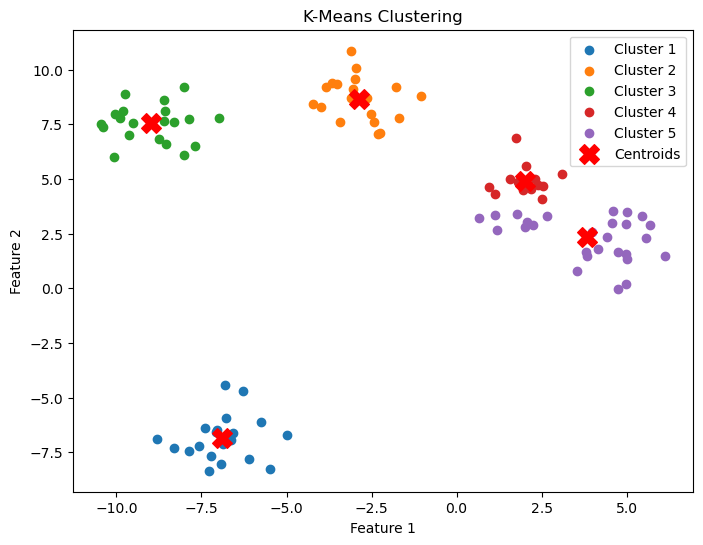

Latest Centroids: [[-6.88732163 -6.84846391]
 [-2.87559086  8.66758942]
 [-8.97484095  7.55134937]
 [ 2.01656938  4.92987435]
 [ 3.84342643  2.33419505]]
Class assignments for each point: [0, 3, 1, 4, 2, 0, 4, 4, 4, 1, 1, 0, 4, 1, 4, 2, 3, 3, 0, 2, 2, 4, 1, 0, 2, 2, 4, 4, 3, 4, 0, 2, 4, 3, 4, 2, 1, 1, 1, 4, 0, 4, 4, 4, 2, 1, 1, 0, 2, 3, 3, 4, 4, 0, 4, 2, 3, 4, 1, 1, 4, 1, 2, 0, 2, 0, 3, 3, 0, 3, 2, 0, 0, 0, 4, 2, 4, 2, 3, 0, 3, 0, 2, 4, 2, 1, 2, 1, 1, 1, 2, 1, 0, 4, 0, 1, 0, 1, 4, 4]


In [150]:
# Plotting the clusters and centroids
plt.figure(figsize=(8, 6))

# Create an empty array to hold the points by cluster
points_by_cluster = {i: [] for i in range(5)}  # For k = 5 clusters

# Assign points to clusters based on the dictionary of clusters
for point, cluster_label in clusters.items():
    points_by_cluster[cluster_label].append(np.array(point))

# Plot the points of each cluster
for i in range(5):
    cluster_points = np.array(points_by_cluster[i])
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {i+1}')

# Plot the centroids
plt.scatter(centroids[:, 0], centroids[:, 1], color='red', marker='X', s=200, label='Centroids')

plt.legend()
plt.title('K-Means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

# Print the latest centroids
print("Latest Centroids:", centroids)

# Create Class list, which is the cluster assignments for each point in X
Class = []
for point in X:
    cluster_label = clusters[tuple(point)]
    Class.append(cluster_label)

print("Class assignments for each point:", Class)